Загрузим файл `data_Mar_64.txt`.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
data = pd.read_csv('data_Mar_64.txt', header=None)


Первый столбец - ответ, положим его в отдельную переменную.

In [3]:
X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

Целевая переменная принимает текстовое значение. С помощью `LabelEncoder` из `sklearn` закодируйте текстовую переменную `y_name` и сохраните полученные значения в переменную `y`.

In [4]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y_name)

С помощью метода главных компонент снизьте размерность признакового пространства до двух. Зафиксируйте `random_state=0`

In [5]:
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X)

Выберите объекты, которые соответствуют значениям от 0 до 14 целевой переменной `y`. Изобразите выбранные объекты в двумерном пространстве признаков с помощью метода `scatter` из `matplotlib.pyplot`. Чтобы разным цветом отобразить объекты разных классов, в метод `scatter` передайте `c = y[y<15]`.

In [6]:
ind = [i for i, v in enumerate(y) if v <= 14]

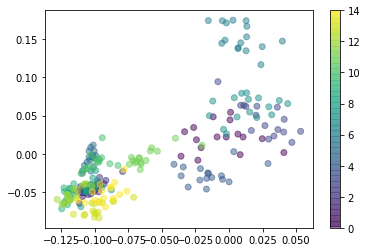

In [7]:
plt.scatter(X_pca[ind][:,0], X_pca[ind][:,1], c=y[y<15], alpha=0.5)
plt.colorbar()
plt.show()

Проделайте то же самое для метода TSNE.

In [8]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

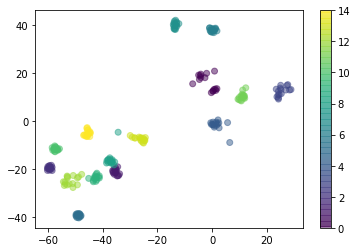

In [9]:
plt.scatter(X_tsne[ind][:,0], X_tsne[ind][:,1], c=y[y<15], alpha=0.5)
plt.colorbar()
plt.show()

1. Укажите координаты объекта с индексом 0 после применения метода TSNE. Округлите числа до сотых.

In [10]:
cords_0_tsne = (-7.12, 15.6)

In [11]:
# Небольшая проверка для себя
import hashlib

assert hashlib.sha256(str(round(cords_0_tsne[0], 2)).encode()).hexdigest() == '7ce8c74c6758fba5b54a86c376291d2f1b7c3ab6b931b3220b5e9b4b95cacb1b'

In [12]:
# проверка, просто запустите ячейку


**Внимание:** При сдаче закомментируйте обучение TSNE и оставьте только ответ. 

2. Укажите координаты объекта с индексом 0 после применения метода PCA. Округлите числа до сотых.

In [13]:
cords_0_pca = (round(X_pca[0][0],2), round(X_pca[0][1],2))

In [14]:
# Небольшая проверка для себя
import hashlib

assert hashlib.sha256(str(round(cords_0_pca[0], 2)).encode()).hexdigest() == 'a39fff1990f5a397add4a9ad28477c9918bd1d4e870ac5e5e38824313fd182af'

In [15]:
# проверка, просто запустите ячейку


3. Какие выводы можно сделать из полученных изображений?

1) Только с помощью метода **PCA** удалось визуализировать объекты на плоскоти и объекты разных классов визуально разделимы

2) Только с помощью метода **TSNE** удалось визуализировать объекты на плоскоти и объекты разных классов визуально разделимы

3) С помощью методов **TSNE и PCA** удалось визуализировать объекты на плоскоти и объекты разных классов визуально разделимы

4) С помощью методов **TSNE и PCA** удалось визуализировать объекты на плоскоти и объекты разных классов визуально **не** разделимы


In [16]:
answer = 3

In [17]:
# проверка, просто запустите ячейку


## K_means

Реализуйте класс MyKMeans.

Класс должен соответствовать шаблону, который приведен ниже

В конструктор класса передаются:
- n_clusters - число кластеров, на которое будут разбиты данные

- n_iters - максимальное число итераций, которое может быть сделано в данном алгоритме

В методе `fit`:

- self.centers - центры кластеров, которые пересчитываются на каждой итерации. Изначально выбираются случайным образом с фиксированым seed.

далее в цикле по числу итераций вам необходимо реализовать:
-  вычисление ближайшего центра кластера для каждого объекта
- пересчет центра каждого кластера (среднее каждой из координат всех объектов, отнесенных к этому кластеру)
посчитанные новые центры кластеров положите в переменную `new_centers`

В методе `predict`:

вычисляются ближайшие центры кластеров для объектов `X`




In [18]:
from sklearn.metrics import pairwise_distances_argmin
class MyKmeans:
    def __init__(self,X, n_clusters=3, n_iters = 100):
        self.n_clusters = n_clusters
        self.n_iters = n_iters
        self.X = X
        
    def fit(self, X):
        np.random.seed(0)
        self.centers = np.random.uniform(low=X.min(axis = 0),
                                high=X.max(axis = 0),
                                size=(self.n_clusters, X.shape[1]))

        for it in range(self.n_iters):
            self.last_iter = it
            labels = self.predict(X) 
            new_centers = np.array([self.X[labels == i].mean(0) for i in range(self.n_clusters)])
        
            if np.all(self.centers == new_centers):
                break
            self.centers = new_centers
        return self.centers
    
    def predict(self, X):
        labels = pairwise_distances_argmin(self.X, self.centers)
        return labels

Сгенерируем данные для кластеризации

In [19]:
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 3.0, 0.5],
                             random_state=0)

In [20]:
X, y = noisy_blobs

4. Кластеризуйте объекты noisy_blobs с помощью `MyKMeans`, используйте гиперпараметры `n_clusters=3`, `n_iters=100`. Укажите ответ для объекта с индексом **254**.

In [21]:
model = MyKmeans(X, n_clusters = 3, n_iters = 100)
model.fit(X)
prediction = model.predict(X)[254]
object_254_res = prediction

In [22]:
# проверка, просто запустите ячейку


5. Кластеризуйте объекты noisy_blobs, используйте гиперпараметры `n_clusters=3`, `n_iters=5`. Укажите ответ для того же объекта (с индексом 254).

In [23]:
model = MyKmeans(X, n_clusters = 3, n_iters = 5)
model.fit(X)
prediction = model.predict(X)[254]
object_254_res2 = prediction

In [24]:
# проверка, просто запустите ячейку


6. Вычислите у какого числа объектов изменилась метка предсказываемого кластера при изменении гиперпараметра n_iters с 5 до 100

In [25]:
model_1 = MyKmeans(X,n_clusters=3, n_iters = 5)
model_1.fit(X)
prediction_1 = model_1.predict(X)

model_2 = MyKmeans(X,n_clusters=3, n_iters = 100)
model_2.fit(X)
prediction_2 = model_2.predict(X)

print( f"Изменилась метка у {(prediction_1!=prediction_2).sum()} объектов")

Изменилась метка у 17 объектов


In [26]:
num_of_changed = (prediction_1!=prediction_2).sum()

In [27]:
# Небольшая проверка для себя
import hashlib

assert hashlib.sha256(str(num_of_changed).encode()).hexdigest() == '4523540f1504cd17100c4835e85b7eefd49911580f8efff0599a8f283be6b9e3'

In [28]:
# проверка, просто запустите ячейку


7. Определите за сколько итераций сошелся алгоритм на объектах noisy_blobs?

In [29]:
print(f'model_1:{model_1.last_iter}, model_2:{model_2.last_iter}')

model_1:4, model_2:10


In [30]:
num_of_iterations = model_2.last_iter

In [31]:
# проверка, просто запустите ячейку


## DBSCAN

8. Кластеризуйте объекты noisy_blobs с помощью DBSCAN. Используйте реализацию DBSCAN из sklearn. Зафиксируйте гиперпараметр eps=0.5. Укажите ответ для того же объекта (с индексом 254).

In [32]:
dbscan = DBSCAN(eps=0.5)
clusters = dbscan.fit_predict(X)[254]

In [33]:
object_254_res3 = -1

In [34]:
# проверка, просто запустите ячейку


Как вы можете заметить, разные параметры и алгоритмы по-разному определяют один и тот же объект.

9. Укажите полученное число кластеров.

In [35]:
num_of_clusters = len(np.unique(dbscan.fit_predict(X)))

In [36]:
# проверка, просто запустите ячейку


10. Сколько объектов было отнечено к выбросам (имеют метку -1)?

In [37]:
num_of_outliers = (dbscan.fit_predict(X) == -1).sum()

In [38]:
# Небольшая проверка для себя
import hashlib

assert hashlib.sha256(str(num_of_outliers).encode()).hexdigest() == '043066daf2109523a7490d4bfad4766da5719950a2b5f96d192fc0537e84f32a'

In [39]:
# проверка, просто запустите ячейку


Если при сдаче появляется ошибка, в которой встречается ```Timeout waiting for execute reply (30s).``` - посмотрите, какие ячейки в ноутбуке у вас выполняются дольше всего. В данных заданиях оставьте только ответы.